In [45]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)
plt.style.use('seaborn-colorblind')
plt.rc('axes', grid=True)
plt.rc('savefig', format='png', facecolor='None')

In [46]:
# load pickle into data frame
with open("pmdarima_cv_res_oct24.pkl","rb") as f:
    results = pickle.load(f)

In [47]:
results.model.replace('Benchmark', 'Univariate', inplace=True)
results.model.replace('Holdout Test Benchmark', 'Test - Univariate', inplace=True)
results.model.replace('+ MFR OCC', 'MFR Occupancy', inplace=True)
results.model.replace('Holdout Test + MFR OCC', 'Test - MFR Occupancy', inplace=True)
results.model.replace('+ MFR OCC & Rent', 'MFR Occ & Rent', inplace=True)
results.model.replace('Holdout Test + MFR OCC & Rent', 'Test - MFR Occ & Rent', inplace=True)
results.model.replace('+ MFR Rent', 'MFR Rent', inplace=True)
results.model.replace('Holdout Test + MFR Rent', 'Test - MFR Rent', inplace=True)

In [48]:
results['Market'] = results['zipcode'].apply(lambda x: 'Atlanta' if x.startswith('3') else 'Cleveland')

In [49]:
results.rename(columns={'mmape':'mape'}, inplace=True)

In [50]:
results.reset_index(drop=True, inplace=True)

In [51]:
results

,zipcode,pdq,pdqs,model,mape,maic,mbic,mmae,mmse,Market
0,30002,"(1, 1, 0)","(0, 0, 0, 12)",Univariate,0.007755,-9.438502,-6.032019,1.216666,2.483867,Atlanta
1,30002,"(1, 1, 0)","(1, 0, 0, 12)",Univariate,0.007755,-9.438502,-6.032019,1.216666,2.483867,Atlanta
2,30002,"(0, 2, 0)","(0, 0, 0, 12)",Test - Univariate,0.001592,3.495411,6.038706,0.305630,0.175959,Atlanta
3,30004,"(1, 1, 0)","(0, 0, 0, 12)",Univariate,0.011141,-17.104557,-13.414201,1.711873,5.256760,Atlanta
4,30004,"(1, 1, 0)","(1, 0, 0, 12)",Univariate,0.011141,-17.104557,-13.414201,1.711873,5.256760,Atlanta
...,...,...,...,...,...,...,...,...,...,...
3012,44321,"(0, 1, 0)","(1, 0, 0, 12)",MFR Occ & Rent,0.006551,25.354807,30.748405,0.904301,1.256953,Cleveland
3013,44321,"(1, 1, 0)","(0, 0, 0, 12)",MFR Occ & Rent,0.006551,25.354807,30.748405,0.904301,1.256953,Cleveland
3014,44321,"(1, 2, 1)","(0, 0, 0, 12)",Test - MFR Occ & Rent,0.005973,109.617202,122.333676,1.030832,1.194218,Cleveland
3015,44333,"(0, 1, 0)","(0, 0, 0, 12)",MFR Occ & Rent,0.011028,23.674274,27.932377,1.551590,3.099490,Cleveland


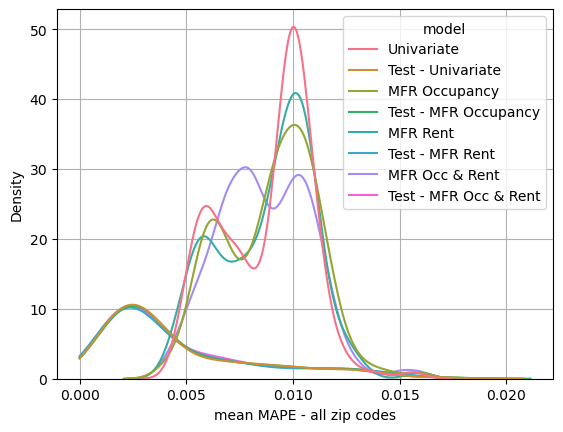

In [52]:
sns.kdeplot(data=results, x='mape', hue='model', clip=(0,0.175))
plt.xlabel('mean MAPE - all zip codes')
plt.title('')
plt.savefig('cv_kde_sarimax')
plt.show()